In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from pathlib import Path
import os
from matplotlib.patches import Rectangle
import sys
from typing import Dict, List, Optional, Tuple, Union
from dataclasses import dataclass

2024-06-11 12:14:01.190424: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 12:14:01.222740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 12:14:01.222760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 12:14:01.223465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-11 12:14:01.228232: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 12:14:01.228721: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Visualize Images and their labels

In [2]:
#helper_path = os.path.join(os.path.dirname(__file__), '../tools')
helper_path = '../tools'
sys.path.append(helper_path)
from naoth.log import BoundingBox, Point2D
from helper import load_image_as_yuv422_y_only_better_generic

### Visualize robot masks

In [ ]:
images = list(Path("./datasets/bottom/image").glob('**/*.png'))
image_path = images[0]
img = load_image_as_yuv422_y_only_better_generic(str(image_path), rescale=True)  # FIXME

label_path = image_path.parent.parent / "label" / image_path.name
mask = cv2.imread(str(label_path), cv2.IMREAD_UNCHANGED)
print(label_path)
print(image_path)

print(img.shape)
image_height, image_width, _ = img.shape
label_height, label_width, _ = mask.shape


fig, axs = plt.subplots(1, 1, figsize=(10, 10))
ax = axs
ax.imshow(img, extent=(0,image_width,0,image_height))
ax.imshow(mask[:,:,2], extent=(0,label_width,0,label_height), alpha=0.5)
ax.axis("off")

### Visualize ball masks (experimental)

(0.0, 640.0, 0.0, 480.0)

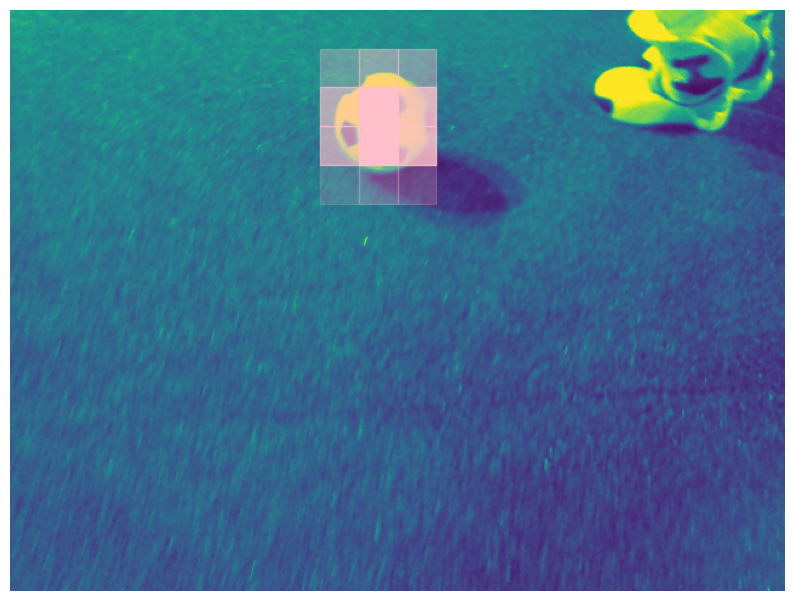

In [37]:
images = list(Path("./datasets/bottom/image").glob('**/*.png'))
image_path = images[4]
img = load_image_as_yuv422_y_only_better_generic(str(image_path), rescale=True)  # FIXME

label_path = image_path.parent.parent / "label" / image_path.name
mask = cv2.imread(str(label_path), cv2.IMREAD_UNCHANGED)
#print(label_path)
#print(image_path)

#print(img.shape)
image_height, image_width, _ = img.shape
label_height, label_width, _ = mask.shape

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
ax = axs
ax.imshow(img, extent=(0,image_width,0,image_height))

# Notes:
"""
its kinda weird to figure out the coordinates again from the mask, it would be easier if I use the original bounding box information
"""
top_left = Point2D(267, 344)
bottom_right = Point2D(267 + 80, 344 + 87)
target = BoundingBox(top_left, bottom_right)
#target = BoundingBox(top_left, bottom_right)
# TODO basically create a grid here and draw rectangles if the overlap with the given rectangle
grid = np.zeros((15, 20))
grid_cell_height = int(image_height / 15)
grid_cell_width = int(image_width / 20)


for y in range(grid.shape[0]):
      for x in range(grid.shape[1]):
            cell_x1 = x * grid_cell_width
            cell_y1 = y * grid_cell_height
            cell_x2 = x * grid_cell_width + grid_cell_width
            cell_y2 = y * grid_cell_height + grid_cell_height
            top_left = Point2D(cell_x1, cell_y1)
            bottom_right = Point2D(cell_x2, cell_y2)
            #cell = BoundingBox(top_left, bottom_right)
            cell_bb = BoundingBox.from_coords(cell_x1, cell_y1,cell_x2, cell_y2)
            intersection = cell_bb.intersection(target)
            
            if not intersection is None:
                  value = intersection.area / cell_bb.area
                  #print(value)
                  cell = Rectangle((x *grid_cell_width , y*grid_cell_height), grid_cell_width, grid_cell_height, color='pink', alpha=value)
                  ax.add_patch(cell)
            #print(intersection)



#ax.imshow(img, extent=(0,image_width,0,image_height))
#ax.imshow(mask[:,:,0], extent=(0,label_width,0,label_height), alpha=0.5)

ax.axis("off")

### Visualize ball mask from dataset

In [56]:
images = list(Path("./datasets/bottom/image").glob('**/*.png'))
for image_path in images:
    label_path = image_path.parent.parent / "label" / image_path.name
    mask = cv2.imread(str(label_path), cv2.IMREAD_UNCHANGED)
    sum = np.sum(mask[:,:,0])
    if not sum.is_integer():
        print(image_path)

(0.0, 640.0, 0.0, 480.0)

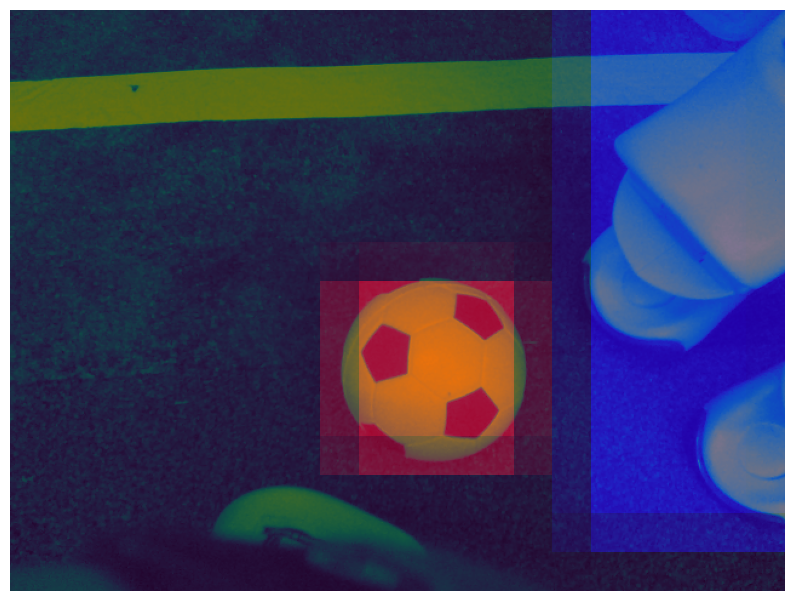

In [65]:
images = list(Path("./datasets/bottom/image").glob('**/*.png'))


image_path = images[7]
img = load_image_as_yuv422_y_only_better_generic(str(image_path), rescale=True)  # FIXME

label_path = image_path.parent.parent / "label" / image_path.name
mask = cv2.imread(str(label_path), cv2.IMREAD_UNCHANGED)
mask = mask / 255.0

image_height, image_width, _ = img.shape
label_height, label_width, _ = mask.shape

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
ax = axs
ax.imshow(img, extent=(0,image_width,0,image_height))
ax.imshow(mask[:,:,:], extent=(0,image_width,0,image_height), alpha=0.5)

ax.axis("off")